2.40: ibm_kawasaki received job #1 requiring 15 qubits. 112 qubits remains
2.40: Job #1 will take 51.4299 sim-mins on ibm_kawasaki.
3.18: ibm_kawasaki received job #2 requiring 8 qubits. 104 qubits remains
3.18: Job #2 will take 56.8368 sim-mins on ibm_kawasaki.
5.02: ibm_kawasaki received job #3 requiring 19 qubits. 85 qubits remains
5.02: Job #3 will take 45.0293 sim-mins on ibm_kawasaki.
7.54: ibm_kawasaki received job #4 requiring 13 qubits. 72 qubits remains
7.54: Job #4 will take 45.7454 sim-mins on ibm_kawasaki.
8.22: ibm_kawasaki received job #5 requiring 15 qubits. 57 qubits remains
8.22: Job #5 will take 54.1253 sim-mins on ibm_kawasaki.
9.69: ibm_kawasaki received job #6 requiring 17 qubits. 40 qubits remains
9.69: Job #6 will take 48.9839 sim-mins on ibm_kawasaki.
16.23: ibm_kawasaki received job #7 requiring 20 qubits. 20 qubits remains
16.23: Job #7 will take 59.8299 sim-mins on ibm_kawasaki.
16.25: ibm_kawasaki received job #8 requiring 17 qubits. 3 qubits remains
16.25:

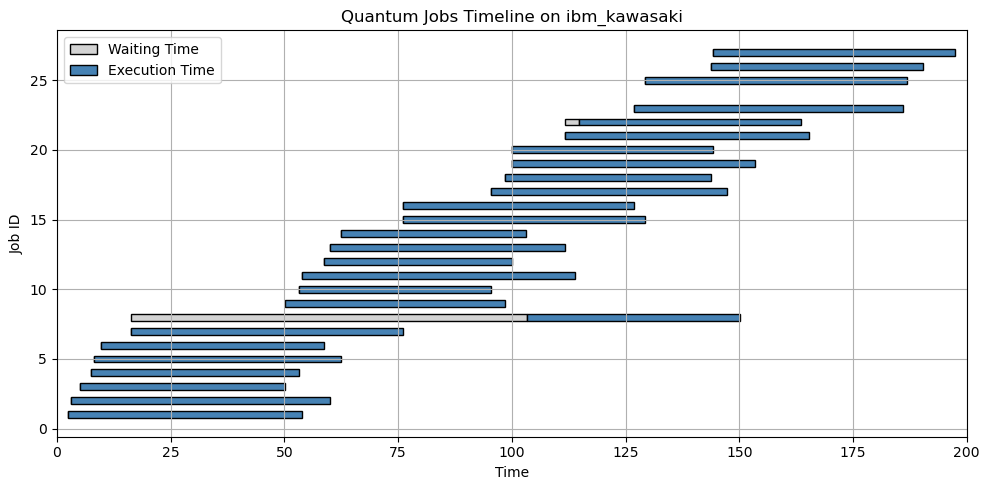

In [12]:
from QCloud import *
import matplotlib.pyplot as plt

def plot_timeline(job_records): 
    filtered_job_ids = []
    wait_starts = []
    wait_durations = []
    exec_starts = []
    exec_durations = []

    for job_id in sorted(job_records.keys()):
        job = job_records[job_id]
        if 'devc_arrive' in job and 'devc_start' in job and 'devc_finish' in job:
            filtered_job_ids.append(job_id)
            wait_starts.append(job['devc_arrive'])
            wait_durations.append(job['devc_start'] - job['devc_arrive'])
            exec_starts.append(job['devc_start'])
            exec_durations.append(job['devc_finish'] - job['devc_start'])

    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot waiting time in light gray
    ax.barh(filtered_job_ids, wait_durations, left=wait_starts, height=0.5, color='lightgray', label='Waiting Time', edgecolor='black')

    # Plot execution time in blue
    ax.barh(filtered_job_ids, exec_durations, left=exec_starts, height=0.5, color='steelblue', label='Execution Time', edgecolor='black')

    ax.set_xlabel("Time")
    ax.set_ylabel("Job ID")
    ax.set_title("Quantum Jobs Timeline on ibm_kawasaki")
    ax.set_xlim(0, 200)
    ax.grid(True)
    ax.legend()
    # ax.invert_yaxis()  # Optional: show Job 1 at the top
    plt.tight_layout()
    plt.show()

ibm_kawasaki = IBM_Kawasaki(env=None, name="ibm_kawasaki", printlog = True)
qcloudsimenv = QCloudSimEnv(devices=[ibm_kawasaki],
                    broker_class=ParallelBroker,
                    job_feed_method="generator",
                    job_generation_model=lambda: random.expovariate(lambd=0.5))
qcloudsimenv.run(until=200)

job_records = qcloudsimenv.job_records_manager.get_job_records()
plot_timeline(job_records)

In [8]:
job_records

{1: {'arrival': 0.43,
  'devc_name': 'ibm_kawasaki',
  'devc_arrive': 0.4258,
  'devc_start': 0.4258,
  'devc_finish': 40.9936,
  'fidelity': 0.688},
 2: {'arrival': 3.07,
  'devc_name': 'ibm_kawasaki',
  'devc_arrive': 3.0682,
  'devc_start': 3.0682,
  'devc_finish': 57.4027,
  'fidelity': 0.7536},
 3: {'arrival': 7.76,
  'devc_name': 'ibm_kawasaki',
  'devc_arrive': 7.755,
  'devc_start': 7.755,
  'devc_finish': 61.2406,
  'fidelity': 0.8863},
 4: {'arrival': 7.88,
  'devc_name': 'ibm_kawasaki',
  'devc_arrive': 7.8755,
  'devc_start': 7.8755,
  'devc_finish': 66.1766,
  'fidelity': 0.6292},
 5: {'arrival': 12.98,
  'devc_name': 'ibm_kawasaki',
  'devc_arrive': 12.9775,
  'devc_start': 12.9775,
  'devc_finish': 53.5694,
  'fidelity': 0.6582},
 6: {'arrival': 18.09,
  'devc_name': 'ibm_kawasaki',
  'devc_arrive': 18.0881,
  'devc_start': 18.0881,
  'devc_finish': 70.222,
  'fidelity': 0.7043},
 7: {'arrival': 20.72,
  'devc_name': 'ibm_kawasaki',
  'devc_arrive': 20.7212,
  'devc_star